In [6]:
import networkx as nx
import pandas as pd
air_data = pd.read_csv('dump_output.csv')


air_graph_1995 = air_data[air_data.YEAR == 1995]
G_1995 = nx.DiGraph()
for row in air_graph_1995.iterrows():
    G_1995.add_edge(row[1].ORIGIN, row[1].DEST)
    
air_graph_2000 = air_data[air_data.YEAR == 2000]
G_2000 = nx.DiGraph()
for row in air_graph_2000.iterrows():
    G_2000.add_edge(row[1].ORIGIN, row[1].DEST)
    
air_graph_2005 = air_data[air_data.YEAR == 2005]
G_2005 = nx.DiGraph()
for row in air_graph_2005.iterrows():
    G_2005.add_edge(row[1].ORIGIN, row[1].DEST)
    
air_graph_2010 = air_data[air_data.YEAR == 2010]
G_2010 = nx.DiGraph()
for row in air_graph_2010.iterrows():
    G_2010.add_edge(row[1].ORIGIN, row[1].DEST)
    
air_graph_2015 = air_data[air_data.YEAR == 2015]
G_2015 = nx.DiGraph()
for row in air_graph_2015.iterrows():
    G_2015.add_edge(row[1].ORIGIN, row[1].DEST)

In [7]:
sorted(nx.pagerank(G_2015).items(), key=lambda x:x[1], reverse=True)[0:5]

[('ANC', 0.010425531156396325),
 ('HPN', 0.008715287139161587),
 ('FAI', 0.007865131822111036),
 ('DFW', 0.00716803823211377),
 ('DEN', 0.006557279519803015)]

In [8]:
airline = [(i, air_data[air_data.YEAR == i].UNIQUE_CARRIER_NAME.value_counts()[0:5].reset_index().rename(columns={0: 'Airline', 'UNIQUE_CARRIER_NAME': 'count'})) for i in [1995, 2000, 2005, 2010, 2015]]

In [9]:
d = {}
for i, year in airline:
    for row in year.iterrows():
        if row[1][0] in d:
            d[row[1][0]].append((i, row[1][1]))
        else:
            d[row[1][0]] = [(i, row[1][1])]

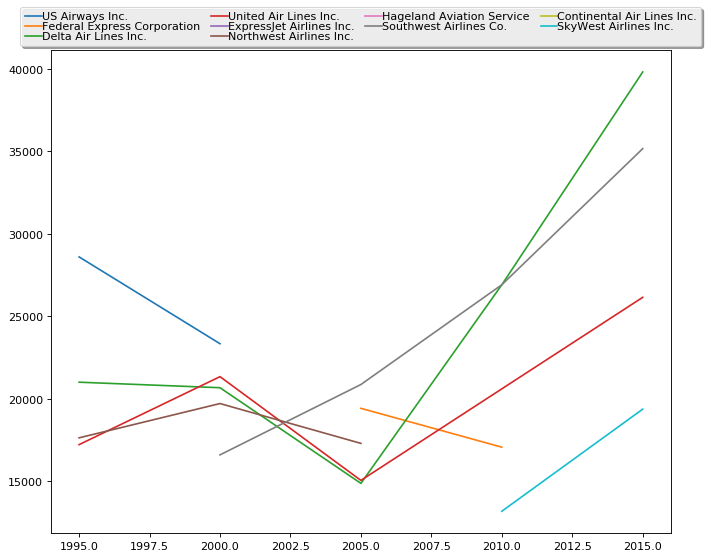

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
labels = []
for i, j in d.items():
    year = [k for k, l in j]
    per = [l for k,l in j]
    plt.plot(year, per)
    labels.append(i)
plt.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)